In [27]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas


In [28]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(3)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954


In [29]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [30]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform

crypto_scaled = StandardScaler().fit_transform(market_data_df)
display (crypto_scaled)


array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [31]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# crypto_names = market_data_df.index.to_list()
# Set the coinid column as index
crypto_scaled_df = pd.DataFrame(crypto_scaled,  columns=market_data_df.columns, index=market_data_df.index)
# Display sample data
display (crypto_scaled_df.head(5))

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [32]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k=list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init="auto", random_state=1)
    k_model.fit(crypto_scaled_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data  =   {"k":k,"inertia":inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow    =   pd.DataFrame(elbow_data)

# Display the DataFrame
display (df_elbow)

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

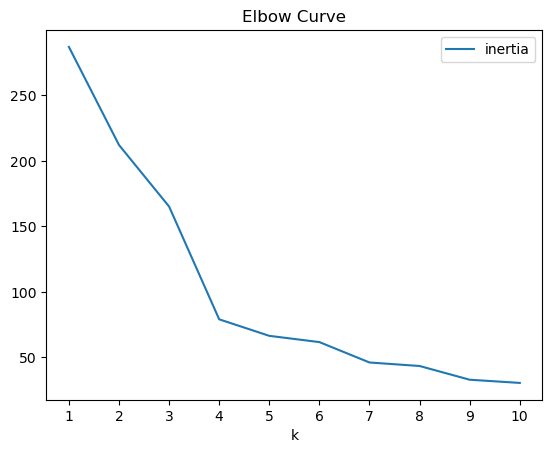

In [33]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k",
    y='inertia',
    title='Elbow Curve',
    xticks=k
)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4 appears to be the best k value. After that the change is little 

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [34]:
# Initialize the K-Means model using the best value for k
model   =   KMeans(n_clusters=4,n_init='auto', random_state=42)

In [35]:
# Fit the K-Means model using the scaled data

model.fit(crypto_scaled_df)

KMeans(n_clusters=4, random_state=42)

In [36]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(crypto_scaled_df)

# View the resulting array of cluster values.
display (crypto_clusters)

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [37]:
# Create a copy of the DataFrame
crypto_cluster_predictions_df   =   crypto_scaled_df.copy()

In [38]:
# Add a new column to the DataFrame with the predicted clusters
crypto_cluster_predictions_df['cluster_lower'] = crypto_clusters

# Display sample data
display (crypto_cluster_predictions_df.head(5))

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster_lower
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

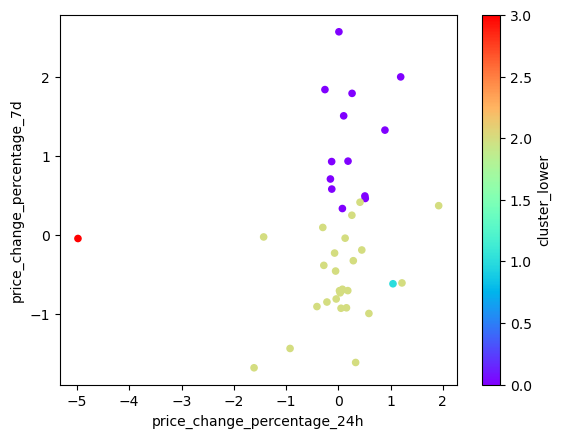

In [39]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
crypto_cluster_predictions_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster_lower",
    colormap="rainbow"
)

### Optimize Clusters with Principal Component Analysis.

In [40]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [41]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
principal_components=pca.fit_transform(crypto_scaled_df)

# View the first five rows of the DataFrame.
display (principal_components[:5])


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [42]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance_ratio    = pca.explained_variance_ratio_
display (f"Explained Variance Ratio:  {explained_variance_ratio}")
display (f'The total exlained variance is {round(100*sum(explained_variance_ratio),1)}%')

'Explained Variance Ratio:  [0.3719856  0.34700813 0.17603793]'

'The total exlained variance is 89.5%'

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The first three principal components combined explain approximately 89.5% of the total variance in your original dataset. This high percentage indicates that these components effectively capture most of the crucial information, making them significant for understanding or reducing the dimensionality of the dataset through PCA.

In [43]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
principal_components_df =   pd.DataFrame(principal_components,columns=['PCA1','PCA2','PCA3'], index=market_data_df.index)

# Display sample data
principal_components_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [44]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k= list(range(1,11))

# Create an empty list to store the inertia values
inertia1 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init="auto", random_state=1)
    k_model.fit(principal_components_df)
    inertia1.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data  =   {"k":k,"inertia1":inertia1}

# Create a DataFrame with the data to plot the Elbow curve

elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
display (elbow_df.head(3))

,k,inertia1
0,1,256.874086
1,2,182.339530
2,3,135.442408


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

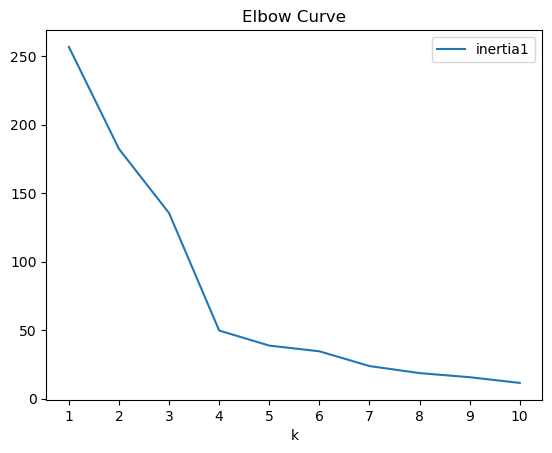

In [45]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(
    x="k",
    y="inertia1",
    title='Elbow Curve',
    xticks=k
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no about the same

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [46]:
# Initialize the K-Means model using the best value for k

model1 = KMeans(n_clusters=4,n_init='auto', random_state=1)

In [47]:
# Fit the K-Means model using the PCA data

model1.fit(principal_components_df)

KMeans(n_clusters=4, random_state=1)

In [48]:
# Predict the clusters to group the cryptocurrencies using the PCA data
prin_comp_clusters= model1.predict(principal_components_df)

# Print the resulting array of cluster values.
display (prin_comp_clusters)

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [49]:
# Create a copy of the DataFrame with the PCA data
prin_comp_custer_df = principal_components_df.copy()

# Add a new column to the DataFrame with the predicted clusters
prin_comp_custer_df['Pre_clusters']=prin_comp_clusters

# Display sample data
display (prin_comp_custer_df.head(5))


,PCA1,PCA2,PCA3,Pre_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [50]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
prin_comp_custer_df.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    c='Pre_clusters',
    colormap='rainbow'
)

:Scatter   [PCA1]   (PCA2,Pre_clusters)

### Determine the Weights of Each Feature on each Principal Component

In [51]:
# Use the columns from the original scaled DataFrame as the index.
# Use the columns from the scaled and encoded DataFrame in step 2.
pca_component_weights = pd.DataFrame(pca.components_.T, 
                                     columns=['PCA1', 'PCA2','PCA3'], 
                                     index=crypto_scaled_df.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    

In [52]:
print("Strongest Positive Influence:")
for col in pca_component_weights.columns:
    max_value = pca_component_weights[col].max()
    max_index = pca_component_weights[col].idxmax()
    print(f"{col}: {max_value} at {max_index}")

print("\nStrangest negative Influence:")
for col in pca_component_weights.columns:
    min_value = pca_component_weights[col].min()
    min_index = pca_component_weights[col].idxmin()
    print(f"{col}: {min_value} at {min_index}")

Strongest Positive Influence:
PCA1: 0.5944679804758318 at price_change_percentage_200d
PCA2: 0.5621822775288032 at price_change_percentage_30d
PCA3: 0.7876703041045975 at price_change_percentage_7d

Strangest negative Influence:
PCA1: -0.416727771559737 at price_change_percentage_24h
PCA2: -0.15078940645576536 at price_change_percentage_1y
PCA3: -0.3613770722056307 at price_change_percentage_60d
